## Q1. Preparing Dataset

In [1]:
import pandas as pd

In [2]:
Customer = pd.read_csv("Customer.csv")
Customer

customer_Id       DOB Gender  city_code
0          268408    2-1-70      M        4.0
1          269696    7-1-70      F        8.0
2          268159    8-1-70      F        8.0
3          270181   10-1-70      F        2.0
4          268073   11-1-70      M        1.0
...           ...       ...    ...        ...
5642       274474  19-12-92      M        2.0
5643       267666  24-12-92      M        6.0
5644       270476  25-12-92      F        3.0
5645       269626  27-12-92      F        5.0
5646       274308  29-12-92      F        5.0

[5647 rows x 4 columns]

In [3]:
Product_hierarchy = pd.read_csv("prod_cat_info.csv")
Product_hierarchy

prod_cat_code          prod_cat  prod_sub_cat_code          prod_subcat
0               1          Clothing                  4                 Mens
1               1          Clothing                  1                Women
2               1          Clothing                  3                 Kids
3               2          Footwear                  1                 Mens
4               2          Footwear                  3                Women
5               2          Footwear                  4                 Kids
6               3       Electronics                  4              Mobiles
7               3       Electronics                  5            Computers
8               3       Electronics                  8  Personal Appliances
9               3       Electronics                  9              Cameras
10              3       Electronics                 10      Audio and video
11              4              Bags                  1                 Mens
12              4              Bags                  4                Women
13              5             Books                  7              Fiction
14              5             Books                 12             Academic
15              5             Books                 10          Non-Fiction
16              5             Books                 11             Children
17              5             Books                  3               Comics
18              5             Books                  6                  DIY
19              6  Home and kitchen                  2           Furnishing
20              6  Home and kitchen                 10              Kitchen
21              6  Home and kitchen                 11                 Bath
22              6  Home and kitchen                 12                Tools

In [50]:
Transaction = pd.read_csv("Transactions.csv",sep=",", parse_dates=True)
Transaction

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         29258453508   270384  27-02-2014                 5              3   
2         51750724947   273420  24-02-2014                 6              5   
3         93274880719   271509  24-02-2014                11              6   
4         51750724947   273420  23-02-2014                 6              5   
...               ...      ...         ...               ...            ...   
23048     94340757522   274550  25-01-2011                12              5   
23049     89780862956   270022  25-01-2011                 4              1   
23050     85115299378   271020  25-01-2011                 2              6   
23051     72870271171   270911  25-01-2011                11              5   
23052     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type  
0       -5  -772  405.300  -4265.300     e-Shop  
1       -5 -1497  785.925  -8270.925     e-Shop  
2       -2  -791  166.110  -1748.110   TeleShop  
3       -3 -1363  429.345  -4518.345     e-Shop  
4       -2  -791  166.110  -1748.110   TeleShop  
...    ...   ...      ...        ...        ...  
23048    1  1264  132.720   1396.720     e-Shop  
23049    1   677   71.085    748.085     e-Shop  
23050    4  1052  441.840   4649.840        MBR  
23051    3  1142  359.730   3785.730   TeleShop  
23052    1   447   46.935    493.935   TeleShop  

[23053 rows x 10 columns]

In [48]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [5]:
# 1. Merging
Customer_Trans = pd.merge(left = Customer,
                          right = Transaction,
                          left_on = 'customer_Id',
                          right_on = 'cust_id',
                          how = 'inner',
                          indicator = True)

In [6]:
Customer_Trans

customer_Id       DOB Gender  city_code  transaction_id  cust_id  \
0           268408    2-1-70      M        4.0     87243835584   268408   
1           268408    2-1-70      M        4.0     16197868036   268408   
2           268408    2-1-70      M        4.0     16197868036   268408   
3           268408    2-1-70      M        4.0     28810141075   268408   
4           268408    2-1-70      M        4.0     64633435931   268408   
...            ...       ...    ...        ...             ...      ...   
23048       269626  27-12-92      F        5.0     71369029396   269626   
23049       269626  27-12-92      F        5.0     94134051896   269626   
23050       274308  29-12-92      F        5.0     26208690928   274308   
23051       274308  29-12-92      F        5.0     57358822237   274308   
23052       274308  29-12-92      F        5.0     58160544337   274308   

        tran_date  prod_subcat_code  prod_cat_code  Qty  Rate      Tax  \
0      13-01-2014                 7              5    5   187   98.175   
1      16-12-2013                 1              4   -5  -210  110.250   
2      12/12/2013                 1              4    5   210  110.250   
3        2/9/2013                10              6    2   813  170.730   
4        6/5/2013                 4              2    3   312   98.280   
...           ...               ...            ...  ...   ...      ...   
23048  18-10-2011                12              6    1   638   66.990   
23049    7/7/2011                 3              1    3  1078  339.570   
23050  22-10-2012                 1              2    2   898  188.580   
23051    5/9/2012                 1              2    4   876  367.920   
23052    4/7/2012                12              5    5   588  308.700   

       total_amt      Store_type _merge  
0       1033.175        TeleShop   both  
1      -1160.250  Flagship store   both  
2       1160.250  Flagship store   both  
3       1796.730        TeleShop   both  
4       1034.280  Flagship store   both  
...          ...             ...    ...  
23048    704.990          e-Shop   both  
23049   3573.570             MBR   both  
23050   1984.580             MBR   both  
23051   3871.920          e-Shop   both  
23052   3248.700          e-Shop   both  

[23053 rows x 15 columns]

In [7]:
len(Customer_Trans)

23053

In [8]:
Customer_Trans_left = pd.merge(left = Customer,
                          right = Transaction,
                          left_on = 'customer_Id',
                          right_on = 'cust_id',
                          how = 'left',
                          indicator = True)

In [9]:
Customer_Trans_left

customer_Id       DOB Gender  city_code  transaction_id   cust_id  \
0           268408    2-1-70      M        4.0    8.724384e+10  268408.0   
1           268408    2-1-70      M        4.0    1.619787e+10  268408.0   
2           268408    2-1-70      M        4.0    1.619787e+10  268408.0   
3           268408    2-1-70      M        4.0    2.881014e+10  268408.0   
4           268408    2-1-70      M        4.0    6.463344e+10  268408.0   
...            ...       ...    ...        ...             ...       ...   
23189       269626  27-12-92      F        5.0    7.136903e+10  269626.0   
23190       269626  27-12-92      F        5.0    9.413405e+10  269626.0   
23191       274308  29-12-92      F        5.0    2.620869e+10  274308.0   
23192       274308  29-12-92      F        5.0    5.735882e+10  274308.0   
23193       274308  29-12-92      F        5.0    5.816054e+10  274308.0   

        tran_date  prod_subcat_code  prod_cat_code  Qty    Rate      Tax  \
0      13-01-2014               7.0            5.0  5.0   187.0   98.175   
1      16-12-2013               1.0            4.0 -5.0  -210.0  110.250   
2      12/12/2013               1.0            4.0  5.0   210.0  110.250   
3        2/9/2013              10.0            6.0  2.0   813.0  170.730   
4        6/5/2013               4.0            2.0  3.0   312.0   98.280   
...           ...               ...            ...  ...     ...      ...   
23189  18-10-2011              12.0            6.0  1.0   638.0   66.990   
23190    7/7/2011               3.0            1.0  3.0  1078.0  339.570   
23191  22-10-2012               1.0            2.0  2.0   898.0  188.580   
23192    5/9/2012               1.0            2.0  4.0   876.0  367.920   
23193    4/7/2012              12.0            5.0  5.0   588.0  308.700   

       total_amt      Store_type _merge  
0       1033.175        TeleShop   both  
1      -1160.250  Flagship store   both  
2       1160.250  Flagship store   both  
3       1796.730        TeleShop   both  
4       1034.280  Flagship store   both  
...          ...             ...    ...  
23189    704.990          e-Shop   both  
23190   3573.570             MBR   both  
23191   1984.580             MBR   both  
23192   3871.920          e-Shop   both  
23193   3248.700          e-Shop   both  

[23194 rows x 15 columns]

In [10]:
len(Customer_Trans_left)

23194

In [11]:
23194-23053

141

In [12]:
Customer_Trans_left.isna().sum()

customer_Id           0
DOB                   0
Gender                9
city_code             8
transaction_id      141
cust_id             141
tran_date           141
prod_subcat_code    141
prod_cat_code       141
Qty                 141
Rate                141
Tax                 141
total_amt           141
Store_type          141
_merge                0
dtype: int64

In [13]:
Customer_Trans_left[Customer_Trans_left['transaction_id'].isna()]

customer_Id       DOB Gender  city_code  transaction_id  cust_id  \
107         267916   17-2-70      F        8.0             NaN      NaN   
201         266969   28-3-70      M        2.0             NaN      NaN   
415         273529   19-6-70      F        1.0             NaN      NaN   
453         274892    5-7-70      F        8.0             NaN      NaN   
641         272408   13-9-70      M        6.0             NaN      NaN   
...            ...       ...    ...        ...             ...      ...   
22469       270232   22-4-92      M       10.0             NaN      NaN   
22539       268693   23-5-92      M        6.0             NaN      NaN   
22691       266947   17-7-92      M        5.0             NaN      NaN   
22716       270973   24-7-92      F        5.0             NaN      NaN   
23175       272125  19-12-92      F        7.0             NaN      NaN   

      tran_date  prod_subcat_code  prod_cat_code  Qty  Rate  Tax  total_amt  \
107         NaN               NaN            NaN  NaN   NaN  NaN        NaN   
201         NaN               NaN            NaN  NaN   NaN  NaN        NaN   
415         NaN               NaN            NaN  NaN   NaN  NaN        NaN   
453         NaN               NaN            NaN  NaN   NaN  NaN        NaN   
641         NaN               NaN            NaN  NaN   NaN  NaN        NaN   
...         ...               ...            ...  ...   ...  ...        ...   
22469       NaN               NaN            NaN  NaN   NaN  NaN        NaN   
22539       NaN               NaN            NaN  NaN   NaN  NaN        NaN   
22691       NaN               NaN            NaN  NaN   NaN  NaN        NaN   
22716       NaN               NaN            NaN  NaN   NaN  NaN        NaN   
23175       NaN               NaN            NaN  NaN   NaN  NaN        NaN   

      Store_type     _merge  
107          NaN  left_only  
201          NaN  left_only  
415          NaN  left_only  
453          NaN  left_only  
641          NaN  left_only  
...          ...        ...  
22469        NaN  left_only  
22539        NaN  left_only  
22691        NaN  left_only  
22716        NaN  left_only  
23175        NaN  left_only  

[141 rows x 15 columns]

In [6]:
Customer_Final = pd.merge(left = Customer_Trans,
                          right = Product_hierarchy,
                          left_on = 'prod_cat_code',
                          right_on = 'prod_cat_code',
                          how = 'inner'
                          )
                          

In [15]:
Customer_Final_Right = pd.merge(left = Customer_Trans,
                          right = Product_hierarchy,
                          left_on = 'prod_cat_code',
                          right_on = 'prod_cat_code',
                          how = 'right'
                          )

In [16]:
len(Customer_Final_Right)

99293

In [17]:
len(Customer_Final)

99293

In [7]:
Customer_Final

customer_Id       DOB Gender  city_code  transaction_id  cust_id  \
0           268408    2-1-70      M        4.0     87243835584   268408   
1           268408    2-1-70      M        4.0     87243835584   268408   
2           268408    2-1-70      M        4.0     87243835584   268408   
3           268408    2-1-70      M        4.0     87243835584   268408   
4           268408    2-1-70      M        4.0     87243835584   268408   
...            ...       ...    ...        ...             ...      ...   
99288       271772  17-12-92      M        2.0     10440850091   271772   
99289       271772  17-12-92      M        2.0     10440850091   271772   
99290       269626  27-12-92      F        5.0     94134051896   269626   
99291       269626  27-12-92      F        5.0     94134051896   269626   
99292       269626  27-12-92      F        5.0     94134051896   269626   

        tran_date  prod_subcat_code  prod_cat_code  Qty  Rate      Tax  \
0      13-01-2014                 7              5    5   187   98.175   
1      13-01-2014                 7              5    5   187   98.175   
2      13-01-2014                 7              5    5   187   98.175   
3      13-01-2014                 7              5    5   187   98.175   
4      13-01-2014                 7              5    5   187   98.175   
...           ...               ...            ...  ...   ...      ...   
99288  26-04-2013                 4              1    4   819  343.980   
99289  26-04-2013                 4              1    4   819  343.980   
99290    7/7/2011                 3              1    3  1078  339.570   
99291    7/7/2011                 3              1    3  1078  339.570   
99292    7/7/2011                 3              1    3  1078  339.570   

       total_amt      Store_type _merge  prod_cat  prod_sub_cat_code  \
0       1033.175        TeleShop   both     Books                  7   
1       1033.175        TeleShop   both     Books                 12   
2       1033.175        TeleShop   both     Books                 10   
3       1033.175        TeleShop   both     Books                 11   
4       1033.175        TeleShop   both     Books                  3   
...          ...             ...    ...       ...                ...   
99288   3619.980  Flagship store   both  Clothing                  1   
99289   3619.980  Flagship store   both  Clothing                  3   
99290   3573.570             MBR   both  Clothing                  4   
99291   3573.570             MBR   both  Clothing                  1   
99292   3573.570             MBR   both  Clothing                  3   

       prod_subcat  
0          Fiction  
1         Academic  
2      Non-Fiction  
3         Children  
4           Comics  
...            ...  
99288        Women  
99289         Kids  
99290         Mens  
99291        Women  
99292         Kids  

[99293 rows x 18 columns]

## Q2. Summary Report


### Column names with their data-types


In [8]:
Customer_Final.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

### First 10 Observations

In [9]:
Customer_Final.head(10)

customer_Id     DOB Gender  city_code  transaction_id  cust_id   tran_date  \
0       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   
1       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   
2       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   
3       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   
4       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   
5       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   
6       268159  8-1-70      F        8.0     65867401816   268159  31-03-2013   
7       268159  8-1-70      F        8.0     65867401816   268159  31-03-2013   
8       268159  8-1-70      F        8.0     65867401816   268159  31-03-2013   
9       268159  8-1-70      F        8.0     65867401816   268159  31-03-2013   

   prod_subcat_code  prod_cat_code  Qty  Rate      Tax  total_amt Store_type  \
0                 7              5    5   187   98.175   1033.175   TeleShop   
1                 7              5    5   187   98.175   1033.175   TeleShop   
2                 7              5    5   187   98.175   1033.175   TeleShop   
3                 7              5    5   187   98.175   1033.175   TeleShop   
4                 7              5    5   187   98.175   1033.175   TeleShop   
5                 7              5    5   187   98.175   1033.175   TeleShop   
6                11              5    5   214  112.350   1182.350        MBR   
7                11              5    5   214  112.350   1182.350        MBR   
8                11              5    5   214  112.350   1182.350        MBR   
9                11              5    5   214  112.350   1182.350        MBR   

  _merge prod_cat  prod_sub_cat_code  prod_subcat  
0   both    Books                  7      Fiction  
1   both    Books                 12     Academic  
2   both    Books                 10  Non-Fiction  
3   both    Books                 11     Children  
4   both    Books                  3       Comics  
5   both    Books                  6          DIY  
6   both    Books                  7      Fiction  
7   both    Books                 12     Academic  
8   both    Books                 10  Non-Fiction  
9   both    Books                 11     Children

### 10 Bottom Observations

In [10]:
Customer_Final.tail(10)

customer_Id       DOB Gender  city_code  transaction_id  cust_id  \
99283       274618   9-12-92      F        7.0     98631113719   274618   
99284       268097  15-12-92      F        7.0     71286190189   268097   
99285       268097  15-12-92      F        7.0     71286190189   268097   
99286       268097  15-12-92      F        7.0     71286190189   268097   
99287       271772  17-12-92      M        2.0     10440850091   271772   
99288       271772  17-12-92      M        2.0     10440850091   271772   
99289       271772  17-12-92      M        2.0     10440850091   271772   
99290       269626  27-12-92      F        5.0     94134051896   269626   
99291       269626  27-12-92      F        5.0     94134051896   269626   
99292       269626  27-12-92      F        5.0     94134051896   269626   

        tran_date  prod_subcat_code  prod_cat_code  Qty  Rate     Tax  \
99283  19-04-2013                 3              1    2   721  151.41   
99284    5/9/2011                 4              1    5   818  429.45   
99285    5/9/2011                 4              1    5   818  429.45   
99286    5/9/2011                 4              1    5   818  429.45   
99287  26-04-2013                 4              1    4   819  343.98   
99288  26-04-2013                 4              1    4   819  343.98   
99289  26-04-2013                 4              1    4   819  343.98   
99290    7/7/2011                 3              1    3  1078  339.57   
99291    7/7/2011                 3              1    3  1078  339.57   
99292    7/7/2011                 3              1    3  1078  339.57   

       total_amt      Store_type _merge  prod_cat  prod_sub_cat_code  \
99283    1593.41          e-Shop   both  Clothing                  3   
99284    4519.45          e-Shop   both  Clothing                  4   
99285    4519.45          e-Shop   both  Clothing                  1   
99286    4519.45          e-Shop   both  Clothing                  3   
99287    3619.98  Flagship store   both  Clothing                  4   
99288    3619.98  Flagship store   both  Clothing                  1   
99289    3619.98  Flagship store   both  Clothing                  3   
99290    3573.57             MBR   both  Clothing                  4   
99291    3573.57             MBR   both  Clothing                  1   
99292    3573.57             MBR   both  Clothing                  3   

      prod_subcat  
99283        Kids  
99284        Mens  
99285       Women  
99286        Kids  
99287        Mens  
99288       Women  
99289        Kids  
99290        Mens  
99291       Women  
99292        Kids

### Five Number Summary

In [11]:
import numpy as np
Data_min = Customer_Final['total_amt'].min()
Data_max = Customer_Final['total_amt'].max()
Data_q1  = np.percentile(Customer_Final.total_amt,25)
median  = np.percentile(Customer_Final.total_amt,50)
Data_q3  = np.percentile(Customer_Final.total_amt,75)
print('Min = ',Data_min)
print('Max = ',Data_max)
print('Median = ',median)
print('Q1 = ',Data_q1)
print('Q3 = ',Data_q3)


Min =  -8270.925
Max =  8287.5
Median =  1761.37
Q1 =  762.45
Q3 =  3585.725


In [12]:
Customer_Final.describe().round(2).T

count          mean           std         min  \
customer_Id        99293.0  2.710300e+05  2.429330e+03   266783.00   
city_code          99257.0  5.470000e+00  2.860000e+00        1.00   
transaction_id     99293.0  5.007320e+10  2.899361e+10  3268991.00   
cust_id            99293.0  2.710300e+05  2.429330e+03   266783.00   
prod_subcat_code   99293.0  6.800000e+00  3.610000e+00        1.00   
prod_cat_code      99293.0  4.000000e+00  1.560000e+00        1.00   
Qty                99293.0  2.440000e+00  2.260000e+00       -5.00   
Rate               99293.0  6.379200e+02  6.215800e+02    -1499.00   
Tax                99293.0  2.488700e+02  1.870100e+02        7.35   
total_amt          99293.0  2.114620e+03  2.502310e+03    -8270.92   
prod_sub_cat_code  99293.0  6.810000e+00  3.620000e+00        1.00   

                            25%           50%           75%           max  
customer_Id        2.689560e+05  2.709820e+05  2.731200e+05  2.752650e+05  
city_code          3.000000e+00  5.000000e+00  8.000000e+00  1.000000e+01  
transaction_id     2.492150e+10  5.011083e+10  7.528121e+10  9.998755e+10  
cust_id            2.689560e+05  2.709820e+05  2.731200e+05  2.752650e+05  
prod_subcat_code   4.000000e+00  7.000000e+00  1.000000e+01  1.200000e+01  
prod_cat_code      3.000000e+00  5.000000e+00  5.000000e+00  6.000000e+00  
Qty                1.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
Rate               3.130000e+02  7.130000e+02  1.109000e+03  1.500000e+03  
Tax                9.828000e+01  1.999200e+02  3.669800e+02  7.875000e+02  
total_amt          7.624500e+02  1.761370e+03  3.585720e+03  8.287500e+03  
prod_sub_cat_code  4.000000e+00  7.000000e+00  1.000000e+01  1.200000e+01

## Frequency Table :

### Store type

In [13]:
Customer_Final['Store_type'].unique()

array(['TeleShop', 'MBR', 'e-Shop', 'Flagship store'], dtype=object)

In [14]:
Customer_Final['prod_cat'].unique()

array(['Books', 'Bags', 'Home and kitchen', 'Footwear', 'Electronics',
       'Clothing'], dtype=object)

In [15]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['Store_type'])
freq_table.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
freq_table.index = ['Female','Male']
freq_table

TeleShop    MBR  e-shop  Flagshipstore
Female      9767   9687    9159          19589
Male       10047  10278   10142          20584

### Prod_cat

In [16]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_cat'])
freq_table.columns = ['Books','Bags','Clothing','Footwear','Electronics','Home and kitchen']
freq_table.index = ['Male','Female']
freq_table

Books   Bags  Clothing  Footwear  Electronics  Home and kitchen
Male     1988  17694      4317     11640         4587              7976
Female   2008  18696      4554     12850         4407              8536

### Prod_subcat

In [17]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_subcat'])
freq_table.columns = ['Men','Women','Kid','Mobile','Computer','Personal Appliances','Cameras','Audio and video',
                      'Fiction','Academic','Non-fiction','Children','Comics','DIY','Furnishing','Kitchen',
                      'Bath','Tools']
freq_table.index = ['Male','Female']
freq_table

Men  Women   Kid  Mobile  Computer  Personal Appliances  Cameras  \
Male    2949   2328  1994    2328      2949                 2949     2328   
Female  3116   2570  2134    2570      3116                 3116     2570   

        Audio and video  Fiction  Academic  Non-fiction  Children  Comics  \
Male               2949     2949      1994         2968      1994    3962   
Female             3116     3116      2134         2987      2134    3991   

         DIY  Furnishing  Kitchen  Bath  Tools  
Male    2328        2949     2328  1994   3962  
Female  2570        3116     2570  2134   3991

## Q3. Histograms for all continuous variables and frequency bars for categorical variables

### Histogram for continous variables -


### 1. Tax

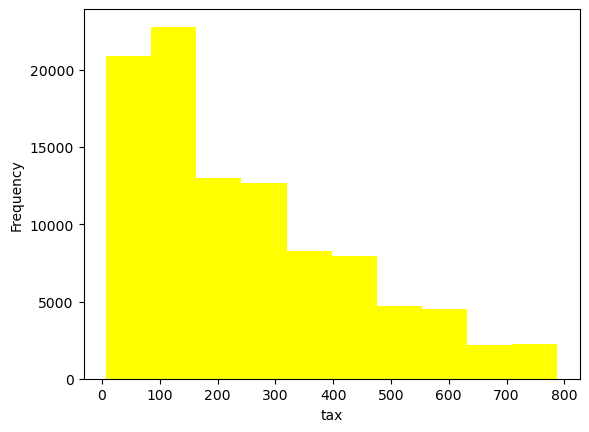

In [18]:
import matplotlib.pyplot as plt
Tax = Customer_Final['Tax']
plt.hist(Tax,color=['yellow'])
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()

### 2. Total amount

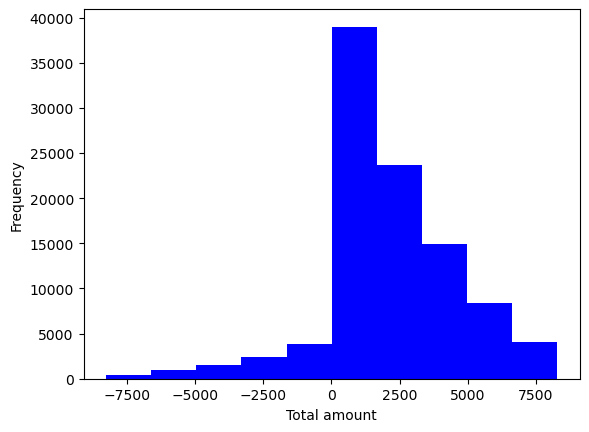

In [19]:
Total_Amt = Customer_Final['total_amt']
plt.hist(Total_Amt,color = 'Blue')
plt.xlabel('Total amount')
plt.ylabel('Frequency')
plt.show()

### Frequency Bar for Categorical variables -



### 1. Gender

<Axes: xlabel='Gender'>

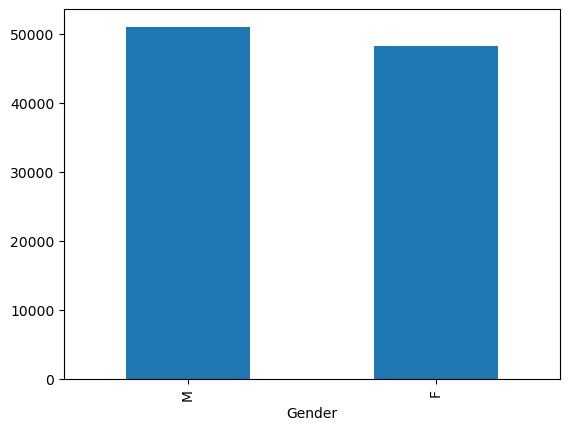

In [20]:
Customer_Final['Gender'].value_counts().plot(kind='bar')

### 2. Store type

<Axes: xlabel='Store_type'>

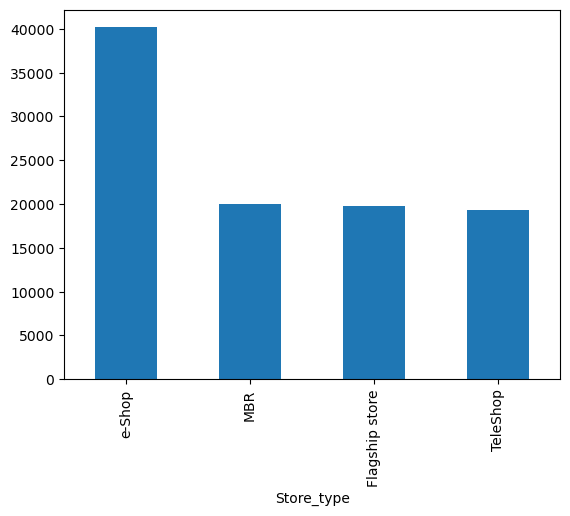

In [21]:
Customer_Final['Store_type'].value_counts().plot(kind='bar')

### 3. Product category

<Axes: xlabel='prod_cat'>

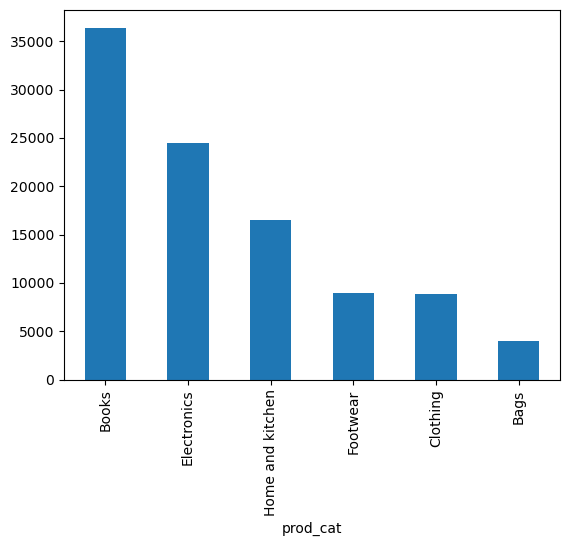

In [22]:
Customer_Final['prod_cat'].value_counts().plot(kind='bar')

### 4. Product sub category

<Axes: xlabel='prod_subcat'>

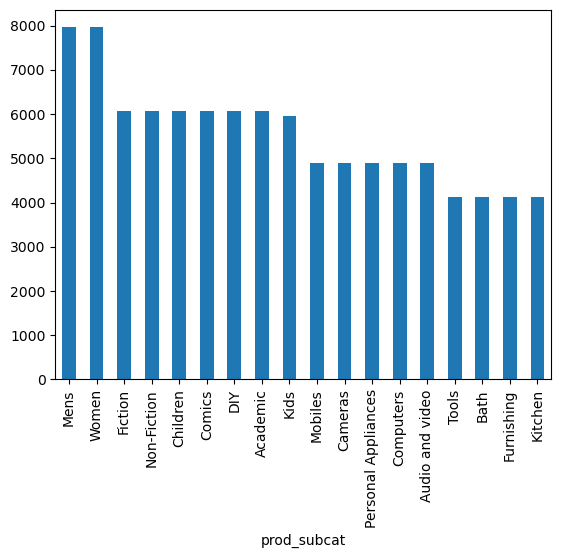

In [23]:
Customer_Final['prod_subcat'].value_counts().plot(kind='bar')

## Q4

### A. Time period of the available transaction data

### B. Count number of negative total amount

In [24]:
Customer_Final[Customer_Final['total_amt']<0]['total_amt'].count()

9294

In [25]:
df = Customer_Final['total_amt']
df

0        1033.175
1        1033.175
2        1033.175
3        1033.175
4        1033.175
           ...   
99288    3619.980
99289    3619.980
99290    3573.570
99291    3573.570
99292    3573.570
Name: total_amt, Length: 99293, dtype: float64

In [26]:
count2 = Customer_Final.loc[(df<0),['total_amt']].count()
count2

total_amt    9294
dtype: int64

## Q5. Analyze which product categories are more popular among females vs male customers.

In [27]:
# Popular among Male
M = Customer_Final.loc[Customer_Final['Gender']=='M']
M.head()


customer_Id     DOB Gender  city_code  transaction_id  cust_id   tran_date  \
0       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   
1       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   
2       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   
3       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   
4       268408  2-1-70      M        4.0     87243835584   268408  13-01-2014   

   prod_subcat_code  prod_cat_code  Qty  Rate     Tax  total_amt Store_type  \
0                 7              5    5   187  98.175   1033.175   TeleShop   
1                 7              5    5   187  98.175   1033.175   TeleShop   
2                 7              5    5   187  98.175   1033.175   TeleShop   
3                 7              5    5   187  98.175   1033.175   TeleShop   
4                 7              5    5   187  98.175   1033.175   TeleShop   

  _merge prod_cat  prod_sub_cat_code  prod_subcat  
0   both    Books                  7      Fiction  
1   both    Books                 12     Academic  
2   both    Books                 10  Non-Fiction  
3   both    Books                 11     Children  
4   both    Books                  3       Comics

In [28]:
group_prod = M.groupby(['prod_cat'])['total_amt'].sum()
group_prod.head(5)
popular_M = group_prod.nlargest(1)
lesspopular_M = group_prod.nsmallest(1)
display('The most popular product category in Male customers is : ',popular_M)
display('The less popular product category in Male customers is : ',lesspopular_M)

'The most popular product category in Male customers is : '

prod_cat
Books    39875836.65
Name: total_amt, dtype: float64

'The less popular product category in Male customers is : '

prod_cat
Bags    4093445.98
Name: total_amt, dtype: float64

In [29]:

# Popular among Female
F = Customer_Final.loc[Customer_Final['Gender']=='F']
group_prod1 = F.groupby(['prod_cat'])['total_amt'].sum()
popular_F = group_prod1.nlargest(1)
lesspopular_F = group_prod1.nsmallest(1)
display('The most popular product category in Female customers is : ',popular_F)
display('The less popular product category in Female customers is : ',lesspopular_F)

'The most popular product category in Female customers is : '

prod_cat
Books    36988153.41
Name: total_amt, dtype: float64

'The less popular product category in Female customers is : '

prod_cat
Bags    4155971.3
Name: total_amt, dtype: float64

#### Among Male vs Female the most popular product category is Books.

## Q6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [30]:
Customer['city_code'].value_counts()

city_code
3.0     595
5.0     586
4.0     582
7.0     575
2.0     564
8.0     562
10.0    558
1.0     551
9.0     546
6.0     526
Name: count, dtype: int64

In [32]:
max_cust = Customer['city_code'].value_counts()
t = max_cust.nlargest(1)

display("City code which has Maximum customers is : ",t)
#percentage of customers from city code 3
tot_customer = Customer['customer_Id'].count()
percent = round((t/tot_customer)*100,2)
print("Percentage of customers from the city code 3 is {}% : ".format(percent))


'City code which has Maximum customers is : '

city_code
3.0    595
Name: count, dtype: int64

Percentage of customers from the city code 3 is city_code
3.0    10.54
Name: count, dtype: float64% : 


## Q7. Which store type sells the maximum products by value and by quantity?

In [33]:
sort_list = Customer_Final.sort_values(['total_amt','Qty'],ascending = False)
sort_list
sort_list.head(1)[['Store_type','total_amt','Qty']]

Store_type  total_amt  Qty
47986   TeleShop     8287.5    5

## Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [34]:
df = pd.DataFrame(Customer_Final)
tf = df[((df.prod_cat=='Electronics') | (df.prod_cat=='Clothing')) & (df.Store_type == 'Flagship store')]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 14658949.89


In [63]:
df = pd.DataFrame(Customer_Final)
tf = df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Store_type == 'Flagship store')]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 14658949.89


# Q8. What was the total amount earned from the "male" gender from  "Electronics" and "Clothing" categories from eshop and mbr Stores?

In [35]:
df = pd.DataFrame(Customer_Final)
tf = df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Gender=='M') & (df.Store_type.isin(['e-Shop','MBR'])) ]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 22616257.105


Total amount earned 14658949.89


## Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [43]:
tf1 = df[(df.Gender == 'M') & (df.prod_cat == 'Electronics')]
total = tf1.total_amt.sum()
print('Total amount earned',total)

Total amount earned 28515547.125


## Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [36]:
df1 = df[(df.total_amt > 0)]
ts = df1.transaction_id.nunique()
print('Total customers having more than 10 unique transactions are - ',ts)
df2 = Transaction[(Transaction.total_amt > 0)]
df2.head(10)

Total customers having more than 10 unique transactions are -  20876


transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
10     29258453508   270384  20-02-2014                 5              3    5   
11     25455265351   267750  20-02-2014                12              6    3   
12      1571002198   275023  20-02-2014                 6              5    4   
14     36554696014   269345  20-02-2014                 3              5    3   
15     56814940239   268799  20-02-2014                 7              5    5   
16     54295803788   270787  20-02-2014                12              5    5   
17     25963520987   274829  20-02-2014                 4              4    3   
18     17183929085   266863  20-02-2014                 1              2    1   
19     44783317894   269452  20-02-2014                 3              1    3   
20     58957828601   269009  20-02-2014                11              5    4   

    Rate      Tax  total_amt      Store_type  
10  1497  785.925   8270.925          e-Shop  
11  1360  428.400   4508.400          e-Shop  
12   587  246.540   2594.540          e-Shop  
14  1253  394.695   4153.695          e-Shop  
15   368  193.200   2033.200          e-Shop  
16   584  306.600   3226.600          e-Shop  
17   502  158.130   1664.130  Flagship store  
18  1359  142.695   1501.695        TeleShop  
19   825  259.875   2734.875        TeleShop  
20   846  355.320   3739.320        TeleShop

## Q11. For all customers aged between 25 - 35, find out:


### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [37]:
import numpy as np
import datetime as dt
print(dt.date.today().year)
curr_year = dt.date.today().year
dob_year = pd.DatetimeIndex(df['DOB']).year          #extract year from DOB
print(curr_year)
print(dob_year)
y = curr_year - dob_year
df['age'] = y
df

2024
2024
Index([2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070, 2070,
       ...
       1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992],
      dtype='int32', name='DOB', length=99293)


customer_Id       DOB Gender  city_code  transaction_id  cust_id  \
0           268408    2-1-70      M        4.0     87243835584   268408   
1           268408    2-1-70      M        4.0     87243835584   268408   
2           268408    2-1-70      M        4.0     87243835584   268408   
3           268408    2-1-70      M        4.0     87243835584   268408   
4           268408    2-1-70      M        4.0     87243835584   268408   
...            ...       ...    ...        ...             ...      ...   
99288       271772  17-12-92      M        2.0     10440850091   271772   
99289       271772  17-12-92      M        2.0     10440850091   271772   
99290       269626  27-12-92      F        5.0     94134051896   269626   
99291       269626  27-12-92      F        5.0     94134051896   269626   
99292       269626  27-12-92      F        5.0     94134051896   269626   

        tran_date  prod_subcat_code  prod_cat_code  Qty  Rate      Tax  \
0      13-01-2014                 7              5    5   187   98.175   
1      13-01-2014                 7              5    5   187   98.175   
2      13-01-2014                 7              5    5   187   98.175   
3      13-01-2014                 7              5    5   187   98.175   
4      13-01-2014                 7              5    5   187   98.175   
...           ...               ...            ...  ...   ...      ...   
99288  26-04-2013                 4              1    4   819  343.980   
99289  26-04-2013                 4              1    4   819  343.980   
99290    7/7/2011                 3              1    3  1078  339.570   
99291    7/7/2011                 3              1    3  1078  339.570   
99292    7/7/2011                 3              1    3  1078  339.570   

       total_amt      Store_type _merge  prod_cat  prod_sub_cat_code  \
0       1033.175        TeleShop   both     Books                  7   
1       1033.175        TeleShop   both     Books                 12   
2       1033.175        TeleShop   both     Books                 10   
3       1033.175        TeleShop   both     Books                 11   
4       1033.175        TeleShop   both     Books                  3   
...          ...             ...    ...       ...                ...   
99288   3619.980  Flagship store   both  Clothing                  1   
99289   3619.980  Flagship store   both  Clothing                  3   
99290   3573.570             MBR   both  Clothing                  4   
99291   3573.570             MBR   both  Clothing                  1   
99292   3573.570             MBR   both  Clothing                  3   

       prod_subcat  age  
0          Fiction  -46  
1         Academic  -46  
2      Non-Fiction  -46  
3         Children  -46  
4           Comics  -46  
...            ...  ...  
99288        Women   32  
99289         Kids   32  
99290         Mens   32  
99291        Women   32  
99292         Kids   32  

[99293 rows x 19 columns]

In [38]:
total = df.loc[((df.age >25) & (df.age <35)) & ((df.prod_cat=='Books') | (df.prod_cat=='Electronics'))]['total_amt'].sum()
print('Total amount spent',total)

Total amount spent 15517429.915


### b.  What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [43]:
Customer_Final['tran_date'].head(20)

0     13-01-2014
1     13-01-2014
2     13-01-2014
3     13-01-2014
4     13-01-2014
5     13-01-2014
6     31-03-2013
7     31-03-2013
8     31-03-2013
9     31-03-2013
10    31-03-2013
11    31-03-2013
12    16-01-2014
13    16-01-2014
14    16-01-2014
15    16-01-2014
16    16-01-2014
17    16-01-2014
18      9/1/2014
19      9/1/2014
Name: tran_date, dtype: object

In [45]:
Customer_Final.isna().sum()

customer_Id           0
DOB                   0
Gender               40
city_code            36
transaction_id        0
cust_id               0
tran_date             0
prod_subcat_code      0
prod_cat_code         0
Qty                   0
Rate                  0
Tax                   0
total_amt             0
Store_type            0
_merge                0
prod_cat              0
prod_sub_cat_code     0
prod_subcat           0
dtype: int64

In [42]:

Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])
Customer_Final.dtypes
t_date = Customer_Final[(Customer_Final['tran_date'] > '2014-01-01') & (Customer_Final['tran_date'] < '2014-03-01')]
total_amount = t_date.total_amt.sum()
print('Total amount spent by the customer - ',total_amount)


C:\Users\agupt\AppData\Local\Temp\ipykernel_44668\667133951.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])


ValueError: time data "9/1/2014" doesn't match format "%d-%m-%Y", at position 3. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.